# Optimal Thresholding

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as matimage
import imageio

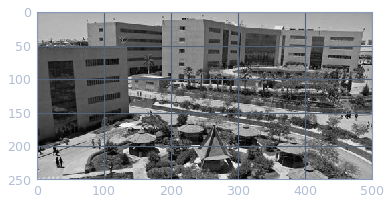

In [8]:
guc = plt.imread("images/guc.jpg")
plt.imshow(guc, cmap="gray")

In [32]:
def optimal_thresholding(image, n):
    if(n == 1): 
        return image.flatten()
    min = image.min()
    max = image.max()
    
    thresholds = np.insert(np.linspace(min, max, n, endpoint=False).astype(int), n, max) 
    while(True):
        segment_means = np.empty(n)
        for i in range(n):
            segment_means[i] = image[(image >= thresholds[i]) & (image < thresholds[i + 1])].mean().astype(int)
        new_thresholds = np.empty(n - 1)
        for i in range(n - 1):
            new_thresholds[i] = (segment_means[i] + segment_means[i + 1]) // 2
        new_thresholds = np.insert(np.sort(new_thresholds), [0, n - 1], [min, max]).astype(int)
        if(np.array_equal(thresholds, new_thresholds)):
            break
        thresholds = new_thresholds.copy()
        
    x, y = image.shape
    segments = np.empty((n, x, y))
    for i in range(n):
        segments[i] = np.where(((image >= thresholds[i]) & (image < thresholds[i + 1])), 1, 0)
    return segments

In [43]:
def segment_image(image, n, name):
    segments = optimal_thresholding(guc, n)
    segmented_image = np.empty(image.shape)
    colors = np.linspace(0, 255, n, endpoint=True)
    for i in range(n):
        segment = segments[i]
        segmented_image = segmented_image + np.where(segment != 0, colors[i], 0)
        plt.imsave(f'output/optimal_thresholding/{name}_{n}_{i+1}.jpg', segments[i], cmap="gray")
    plt.imsave(f'output/optimal_thresholding/{name}_{n}.jpg', segmented_image, cmap="gray")

In [44]:
segment_image(guc, 3, "GUC")
segment_image(guc, 4, "GUC")